In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

/home/akash/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.enable_eager_execution()

### Data import 

In [3]:
data = pd.read_csv('datatraining.csv')

In [4]:
data.drop(columns= ['date'], inplace=True)

In [5]:
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 6 columns):
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1)
memory usage: 445.3 KB


In [7]:
cols = list(data.columns)
cols.remove('Occupancy')
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [8]:
X = data[cols]

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X), columns=cols)
Y = data['Occupancy']

In [10]:
train_data = X1.join(Y)

In [11]:
for i in train_data.columns:
    train_data.fillna(method='bfill', inplace=True)
    train_data.fillna(method='ffill', inplace=True)

In [12]:
train_data['Occupancy'].value_counts()

0.0    6414
1.0    1729
Name: Occupancy, dtype: int64

### TRAINING MODELS

In [13]:
from tensorflow import keras

In [14]:
classifierModel = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
classifierModel.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
classifierModel.fit(np.reshape(train_data[cols].values.astype(np.float64), newshape=(-1,5)), 
                    np.reshape(train_data['Occupancy'].values.astype(np.int64), newshape=(-1,1)),
                    epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
131/131 [==============================] - 1s 7ms/step - loss: 0.3435 - acc: 0.8913 - val_loss: 0.2522 - val_acc: 0.8999
Epoch 2/100
131/131 [==============================] - 1s 5ms/step - loss: 0.2087 - acc: 0.9279 - val_loss: 0.2503 - val_acc: 0.9048
Epoch 3/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1697 - acc: 0.9435 - val_loss: 0.2068 - val_acc: 0.9153
Epoch 4/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1797 - acc: 0.9382 - val_loss: 0.2099 - val_acc: 0.9177
Epoch 5/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1466 - acc: 0.9527 - val_loss: 0.2380 - val_acc: 0.9214
Epoch 6/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1447 - acc: 0.9531 - val_loss: 0.2031 - val_acc: 0.9208
Epoch 7/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1439 - acc: 0.9540 - val_loss: 0.2127 - val_acc: 0.9282
Epoch 8/100
131/131 [==============================] - 1s 5ms/step - 

131/131 [==============================] - 1s 5ms/step - loss: 0.0918 - acc: 0.9736 - val_loss: 0.1977 - val_acc: 0.9251
Epoch 63/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0937 - acc: 0.9733 - val_loss: 0.1947 - val_acc: 0.9257
Epoch 64/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0906 - acc: 0.9734 - val_loss: 0.1767 - val_acc: 0.9282
Epoch 65/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0810 - acc: 0.9757 - val_loss: 0.2093 - val_acc: 0.9245
Epoch 66/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0898 - acc: 0.9737 - val_loss: 0.1885 - val_acc: 0.9269
Epoch 67/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0790 - acc: 0.9771 - val_loss: 0.1829 - val_acc: 0.9288
Epoch 68/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0905 - acc: 0.9733 - val_loss: 0.2205 - val_acc: 0.9227
Epoch 69/100
131/131 [==============================] - 1s 6ms/step - loss:

In [16]:
test_data = pd.read_csv('datatest.csv')
X_test = scaler.transform(test_data[cols])
test_data[cols] = X_test
test_data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,0.801288,-0.068266,0.378488,0.354310,0.193016,0.364728
std,1.010985,0.440589,1.284821,0.931213,0.716400,0.481444
min,-0.412137,-0.656589,-0.613726,-0.569664,-0.656114,0.000000
25%,0.030404,-0.446857,-0.613726,-0.447170,-0.390747,0.000000
50%,0.266426,-0.132259,-0.613726,-0.082870,-0.055659,0.000000
75%,1.708783,0.203433,1.658490,1.112903,0.784987,1.000000
max,3.726444,1.037991,8.101569,2.531657,1.777883,1.000000


In [17]:
classifierModel.evaluate(test_data[cols].values.astype(np.float64), test_data['Occupancy'].values.astype(np.int64))

84/84 [==============================] - 0s 2ms/step


[0.11797135719446779, 0.9774859287054409]

In [18]:
classifierModel.save_weights('./classifierNNWeights')

##### Tensor Forest

In [19]:

params = tf.contrib.tensor_forest.python.tensor_forest.ForestHParams(
  num_classes=2, num_features=5, regression=False,
  num_trees=50, max_nodes=1000)

rfclassifier = \
tf.contrib.tensor_forest.client.random_forest.TensorForestEstimator(params)

rfclassifier.fit(x=train_data[cols].values.astype('float32'), y=train_data['Occupancy'].values.astype('float32'))


Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f93fb56bb38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_

INFO:tensorflow:global_step/sec: 15.7195
INFO:tensorflow:loss = 5.936504e-06, step = 501 (6.362 sec)
INFO:tensorflow:global_step/sec: 15.2305
INFO:tensorflow:loss = 3.4682662e-06, step = 601 (6.566 sec)
INFO:tensorflow:TensorForestLossHook requesting stop.
INFO:tensorflow:Saving checkpoints for 665 into /tmp/tmptquxgb0a/model.ckpt.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:9: clean up resources: None
INFO:tensorflow:Loss for final step: 3.4682648e-06.


TensorForestEstimator(params=None)

In [20]:
y_out = rfclassifier.predict(x=test_data[cols].values.astype('float32'))

INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 50, 'max_nodes': 1000, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 10, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 2, 'num_features': 5, 'regression': False, 'bagged_num_features': 5, 'bagged_features': None, 'num_outputs': 1, 'num_output_columns': 3, 'base_random_seed': 0, 'leaf_model_type': 0, 'stats_model_type': 0, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0, 'params_proto': pruning_type {
  prun

In [21]:
a = list(y_out)


In [22]:
a[2:40]

[{'logits': array([-1.3862944], dtype=float32),
  'logistic': array([0.2], dtype=float32),
  'probabilities': array([0.8, 0.2], dtype=float32),
  'classes': 0,
  'prediction_variance': array([0.16000003, 0.16      ], dtype=float32)},
 {'logits': array([-0.66329414], dtype=float32),
  'logistic': array([0.34], dtype=float32),
  'probabilities': array([0.66      , 0.34000003], dtype=float32),
  'classes': 0,
  'prediction_variance': array([0.22440001, 0.2244    ], dtype=float32)},
 {'logits': array([-0.84729797], dtype=float32),
  'logistic': array([0.29999998], dtype=float32),
  'probabilities': array([0.70000005, 0.29999998], dtype=float32),
  'classes': 0,
  'prediction_variance': array([0.21000001, 0.21      ], dtype=float32)},
 {'logits': array([-1.1526796], dtype=float32),
  'logistic': array([0.23999998], dtype=float32),
  'probabilities': array([0.76, 0.24], dtype=float32),
  'classes': 0,
  'prediction_variance': array([0.18239999, 0.18239999], dtype=float32)},
 {'logits': array

In [71]:
probs = np.array([i['probabilities'] for i in a])


In [44]:
# probs = [(i[0], i[1]) for i in probs]

In [73]:
probs.shape

(2665, 2)

### TRAINING NOISE

##### NN with Cross Entropy

In [74]:
REG_COEFF = 2.0
MIS_COEFF = 1.0
BATCH_SIZE = 80
NUM_EPOCHS = 30
modelHistory = {'reg_loss':[], 'miss_loss':[], 'values':[], 'noise':[], 'orig_labels':[],\
                'pred_labels':[], 'new_labels':[]}


adversarialModel = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation=tf.nn.tanh)
])

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(np.reshape(train_data[cols].values, newshape=(-1,5)), tf.float32),
    tf.cast(np.reshape(train_data['Occupancy'].values, newshape=(-1,1)), tf.int64)))

dataset = dataset.batch(BATCH_SIZE)

In [86]:
optimizer = tf.train.AdamOptimizer()
iter = 0
for epoch in range(NUM_EPOCHS):
    print(iter)
    for (batch, (vals, orig_labels)) in enumerate(dataset.take(-1)):

        with tf.GradientTape() as tape:
            iter+=1
#             pred_labels = classifierModel(vals)
#             print(pred_labels.shape)
            pred_labels = tf.convert_to_tensor(probs[iter*80:(iter+1)*80])
            print(pred_labels.shape)
#             pred
#             print(pred_labels)
            noise = adversarialModel(vals)
            new_labels = classifierModel(tf.add(vals, noise))

            regTerm = tf.math.multiply(tf.reduce_mean(tf.math.abs(noise)), REG_COEFF)
            missTerm = tf.math.multiply(tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
                            tf.math.subtract(1, tf.argmax(pred_labels, axis=1)), new_labels)), MIS_COEFF)

            loss = tf.add(regTerm, missTerm)

        grads = tape.gradient(loss, adversarialModel.trainable_variables)
        optimizer.apply_gradients(zip(grads, adversarialModel.trainable_variables), global_step=tf.train.get_or_create_global_step())

        if batch % 10 == 0:
            modelHistory['reg_loss'].append(regTerm.numpy())
            modelHistory['miss_loss'].append(missTerm.numpy())
            modelHistory['noise'].append(noise.numpy())
            modelHistory['values'].append(vals.numpy())
            modelHistory['orig_labels'].append(orig_labels.numpy())
            modelHistory['pred_labels'].append(pred_labels.numpy())
            modelHistory['new_labels'].append(new_labels.numpy())
        if iter > 1:
            temp1 = modelHistory['reg_loss'][-1] + modelHistory['miss_loss'][-1]
            temp2 = modelHistory['reg_loss'][-2] + modelHistory['miss_loss'][-2]
            if(abs(temp2 - temp1) < 1e-3 or iter > 4):
                break

0
(80, 2)
(80, 2)
(80, 2)
(80, 2)
(80, 2)
5
(80, 2)
6
(80, 2)
7
(80, 2)
8
(80, 2)
9
(80, 2)
10
(80, 2)
11
(80, 2)
12
(80, 2)
13
(80, 2)
14
(80, 2)
15
(80, 2)
16
(80, 2)
17
(80, 2)
18
(80, 2)
19
(80, 2)
20
(80, 2)
21
(80, 2)
22
(80, 2)
23
(80, 2)
24
(80, 2)
25
(80, 2)
26
(80, 2)
27
(80, 2)
28
(80, 2)
29
(80, 2)
30
(80, 2)
31
(80, 2)
32
(25, 2)


ValueError: Shape mismatch: The shape of labels (received (25,)) should equal the shape of logits except for the last dimension (received (80, 2)).

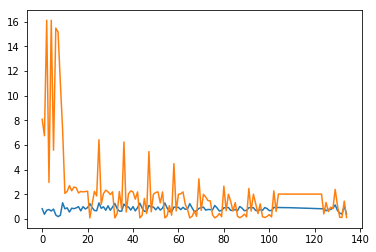

In [80]:
plt.plot(modelHistory['reg_loss'])
plt.plot(modelHistory['miss_loss'])
plt.savefig('Plot-3.png')

In [52]:
np.random.seed(7)
temp = np.asarray([train_data[cols].values\
                   [np.random.randint(low = 0, high=train_data.shape[0])].astype('float32')
                   for i in range(6)])

In [53]:
print(temp.shape)
temp

(6, 5)


array([[ 0.0795752 , -0.9097133 , -0.6137261 , -0.5410289 , -0.87276405],
       [ 1.5768403 ,  0.02910802,  1.6867317 ,  0.537553  ,  0.5019205 ],
       [ 0.42377406, -0.1611875 , -0.6137261 , -0.54421055, -0.04024421],
       [ 1.1515088 , -0.98293865,  1.8972647 ,  0.6202761 , -0.6953054 ],
       [-1.1005353 ,  0.22934772, -0.49048725, -0.5879584 , -0.0960639 ],
       [-0.11710987, -0.7750148 , -0.6137261 , -0.54421055, -0.7870914 ]],
      dtype=float32)

In [54]:
noisy_temp = np.asarray(adversarialModel(temp.reshape(-1, 5)))

In [55]:
noisy_temp

array([[-0.07132854,  0.10668082,  0.62216264,  0.97147983, -0.20473191],
       [-0.12938182, -0.02969338,  0.67064196,  0.41345605,  0.38042086],
       [-0.2074758 ,  0.04486365,  0.66836375,  0.9763742 , -0.4550676 ],
       [-0.03284572,  0.03093785,  0.83426195, -0.05421574,  0.74733955],
       [ 0.03263882,  0.01525571,  0.12281962,  0.98499537, -0.05386202],
       [-0.05933964,  0.08230284,  0.5348388 ,  0.9741815 , -0.17105953]],
      dtype=float32)

In [56]:
classifierModel.predict(temp.reshape(-1, 5))

array([[1.0000000e+00, 3.4001447e-11],
       [1.0516195e-01, 8.9483804e-01],
       [1.0000000e+00, 4.0157003e-10],
       [7.1055539e-02, 9.2894447e-01],
       [1.0000000e+00, 4.8073739e-10],
       [1.0000000e+00, 4.5634718e-11]], dtype=float32)

In [57]:
classifierModel.predict(noisy_temp.reshape(-1, 5))

array([[0.07424838, 0.9257517 ],
       [0.4165192 , 0.58348083],
       [0.04830322, 0.9516968 ],
       [0.15432946, 0.84567046],
       [0.16255286, 0.83744717],
       [0.0880539 , 0.91194606]], dtype=float32)

In [58]:
sum(modelHistory['reg_loss'])/len(modelHistory['reg_loss'])

0.7850654298013233

In [59]:
sum(modelHistory['miss_loss'])/len(modelHistory['miss_loss'])

0.8641845188945173

# Random Forest

In [ ]:
REG_COEFF = 2.0
MIS_COEFF = 1.0
BATCH_SIZE = 80
NUM_EPOCHS = 30
modelHistory = {'reg_loss':[], 'miss_loss':[], 'values':[], 'noise':[], 'orig_labels':[],\
                'pred_labels':[], 'new_labels':[]}


adversarialModel = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation=tf.nn.tanh)
])

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(np.reshape(train_data[cols].values, newshape=(-1,5)), tf.float32),
    tf.cast(np.reshape(train_data['Occupancy'].values, newshape=(-1,1)), tf.int64)))

dataset = dataset.batch(BATCH_SIZE)

In [ ]:
optimizer = tf.train.AdamOptimizer()

for epoch in range(NUM_EPOCHS):

    for (batch, (vals, orig_labels)) in enumerate(dataset.take(-1)):

        with tf.GradientTape() as tape:
            
            y_out = list(rfclassifier.predict(x=vals.numpy()))
            pred_labels = [i['probabilities'] for i in y_out]
            noise = adversarialModel(vals)
            new_labels = classifierModel(tf.add(vals, noise))

            regTerm = tf.math.multiply(tf.reduce_mean(tf.math.abs(noise)), REG_COEFF)
            missTerm = tf.math.multiply(tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
                            tf.math.subtract(1, tf.argmax(pred_labels, axis=1)), new_labels)), MIS_COEFF)

            loss = tf.add(regTerm, missTerm)

        grads = tape.gradient(loss, adversarialModel.trainable_variables)
        optimizer.apply_gradients(zip(grads, adversarialModel.trainable_variables), global_step=tf.train.get_or_create_global_step())

        if batch % 10 == 0:
            modelHistory['reg_loss'].append(regTerm.numpy())
            modelHistory['miss_loss'].append(missTerm.numpy())
            modelHistory['noise'].append(noise.numpy())
            modelHistory['values'].append(vals.numpy())
            modelHistory['orig_labels'].append(orig_labels)
            modelHistory['pred_labels'].append(pred_labels)
            modelHistory['new_labels'].append(new_labels.numpy())
        temp1 = modelHistory['reg_loss'][-1] + modelHistory['miss_loss'][-1]
        temp2 = modelHistory['reg_loss'][-2] + modelHistory['miss_loss'][-2]
        if(abs(temp2 - temp1) < 1e-3):
            break

In [ ]:
 for (batch, (vals, orig_labels)) in enumerate(dataset.take(1)):
    print(vals)
        

In [ ]:
test_data[cols].values.astype('float32').shape